In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
chroma_df = pd.read_csv('results_chroma.csv')
chroma_df['Model'] = ['Chroma' for i in range(len(chroma_df))]
qdrant_df = pd.read_csv('results_qdrant.csv')
chroma_df['Model'] = ['Qdrant' for i in range(len(chroma_df))]

chroma_df.head()

,Unnamed: 0,Chunk Size,Overlap,Embedding Model,Query,Vector DB,Query Time (s),Memory Used,LLM Model,LLM Response,Model
0,0,200,0,nomic-embed-text,What is redis?,chroma,144.315332,259818,llama2,"role='assistant' content=""Redis is an in-memor...",Qdrant
1,0,200,0,nomic-embed-text,What is an AVL tree?,chroma,70.441579,291155,llama2,role='assistant' content='An AVL tree is a typ...,Qdrant
2,0,200,0,nomic-embed-text,How do document databases like MongoDB differ ...,chroma,90.105682,290539,llama2,"role='assistant' content=""Document databases, ...",Qdrant
3,0,200,0,nomic-embed-text,What are tradeoffs between B+ Trees and LSM?,chroma,221.347701,287910,llama2,"role='assistant' content=""B+ Trees and Log-Str...",Qdrant
4,0,200,0,sentence-transformers/all-MiniLM-L6-v2,What is redis?,chroma,72.115397,5811160,llama2,role='assistant' content='Redis is an in-memor...,Qdrant


In [3]:
chroma_qry_avg = chroma_df.groupby('Query')[['Memory Used', 'Query Time (s)']].mean()
chroma_qry_avg.rename(columns= {'Memory Used':'Chroma Memory', 'Query Time (s)':'Chroma Query'}, inplace=True)
qdrant_qry_avg = qdrant_df.groupby('Query')[['Memory Used', 'Query Time (s)']].mean()
qdrant_qry_avg.rename(columns= {'Memory Used':'Qdrant Memory', 'Query Time (s)':'Qdrant Query'}, inplace=True)
merged_avgs = chroma_qry_avg.merge(qdrant_qry_avg, how='left', on='Query')
merged_avgs.reset_index(inplace=True)
merged_avgs


,Query,Chroma Memory,Chroma Query,Qdrant Memory,Qdrant Query
0,How do document databases like MongoDB differ ...,4.056489e+06,86.701187,4.040086e+06,322.262437
1,What are tradeoffs between B+ Trees and LSM?,4.055761e+06,137.903510,4.037765e+06,179.875259
2,What is an AVL tree?,4.055973e+06,62.318876,4.041120e+06,76.266764
3,What is redis?,4.041169e+06,76.007340,4.047262e+06,137.920880


In [4]:
px.bar(merged_avgs,x='Query', y=['Chroma Memory', 'Qdrant Memory'], barmode='group')

In [18]:
px.bar(merged_avgs,x='Query', y=['Chroma Query', 'Qdrant Query'], barmode='group')

Text(0, 0.5, 'Query Time (s)')

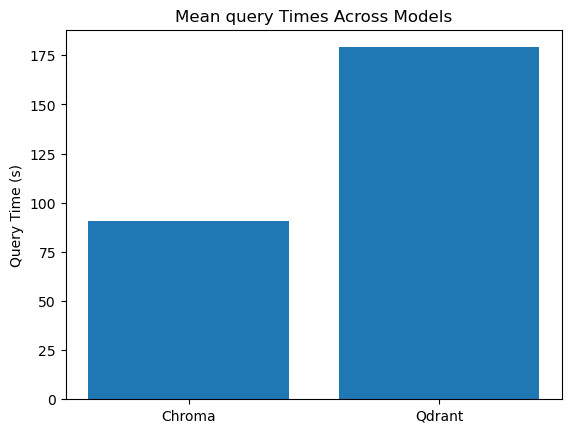

In [36]:
plt.bar(x=['Chroma', 'Qdrant'], height=[chroma_df['Query Time (s)'].mean(), qdrant_df['Query Time (s)'].mean()])
plt.title('Mean query Times Across Models')
plt.ylabel('Query Time (s)')

In [13]:
chroma_embd_avg = chroma_df.groupby('Embedding Model')[['Memory Used', 'Query Time (s)']].mean()
chroma_embd_avg.rename(columns= {'Memory Used':'Chroma Memory', 'Query Time (s)':'Chroma Query'}, inplace=True)
qdrant_embd_avg = qdrant_df.groupby('Embedding Model')[['Memory Used', 'Query Time (s)']].mean()
qdrant_embd_avg.rename(columns= {'Memory Used':'Qdrant Memory', 'Query Time (s)':'Qdrant Query'}, inplace=True)
merged_embd = chroma_embd_avg.merge(qdrant_embd_avg, how='left', on='Embedding Model')
merged_embd.reset_index(inplace=True)
merged_embd

,Embedding Model,Chroma Memory,Chroma Query,Qdrant Memory,Qdrant Query
0,nomic-embed-text,278965.250,102.220810,251069.500,130.794042
1,sentence-transformers/all-MiniLM-L6-v2,5818342.125,77.270156,5821131.375,263.350132
2,sentence-transformers/all-mpnet-base-v2,6059736.750,92.707218,6052474.125,143.099830


In [26]:
concatted = pd.concat([qdrant_df, chroma_df])
model_embed = concatted.groupby(['LLM Model', 'Embedding Model'])[['Memory Used', 'Query Time (s)']].mean()
model_embed.reset_index(inplace=True)
model_embed['model/embed'] = model_embed.apply(lambda row: row['LLM Model'] +', ' + row['Embedding Model'], axis=1)
model_embed.head()

,LLM Model,Embedding Model,Memory Used,Query Time (s),model/embed
0,llama2,nomic-embed-text,270228.125,149.270750,"llama2, nomic-embed-text"
1,llama2,sentence-transformers/all-MiniLM-L6-v2,5818002.625,256.924899,"llama2, sentence-transformers/all-MiniLM-L6-v2"
2,llama2,sentence-transformers/all-mpnet-base-v2,6056307.250,136.023307,"llama2, sentence-transformers/all-mpnet-base-v2"
3,mistral,nomic-embed-text,259806.625,83.744103,"mistral, nomic-embed-text"
4,mistral,sentence-transformers/all-MiniLM-L6-v2,5821470.875,83.695389,"mistral, sentence-transformers/all-MiniLM-L6-v2"


In [30]:
px.bar(model_embed, x='model/embed', y=['Query Time (s)'])


In [29]:
px.bar(model_embed, x='model/embed', y=['Memory Used'])